In [1]:
%load_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from constants import MISSING_CODE, VARIABLE_TYPE

In [3]:
data = pd.read_csv("../data/train.csv")

# Sanity checks

In [4]:
data.head()

,id,ATTEND,BFACIL,BMI,CIG_0,DLMP_MM,DMAR,DOB_MM,DOB_TT,DOB_WK,...,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,DBWT
0,0,1,1,18.5,0,12,,10,1434,5,...,0,0,108,1,1,N,0,F,24,2800
1,1,1,1,18.3,2,4,1,12,2156,6,...,2,1,100,1,1,N,0,M,18,1900
2,2,1,1,27.3,0,3,2,12,1241,2,...,2,2,135,4,1,Y,2,F,27,2960
3,3,1,1,24.0,0,7,2,4,1649,2,...,0,0,111,3,1,N,0,M,29,3657
4,4,2,1,23.6,0,6,1,3,752,2,...,2,0,121,4,1,Y,2,F,37,3742


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108082 entries, 0 to 108081
Data columns (total 38 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           108082 non-null  int64  
 1   ATTEND       108082 non-null  int64  
 2   BFACIL       108082 non-null  int64  
 3   BMI          108082 non-null  float64
 4   CIG_0        108082 non-null  int64  
 5   DLMP_MM      108082 non-null  int64  
 6   DMAR         108082 non-null  object 
 7   DOB_MM       108082 non-null  int64  
 8   DOB_TT       108082 non-null  int64  
 9   DOB_WK       108082 non-null  int64  
 10  FAGECOMB     108082 non-null  int64  
 11  FEDUC        108082 non-null  int64  
 12  ILLB_R       108082 non-null  int64  
 13  ILOP_R       108082 non-null  int64  
 14  ILP_R        108082 non-null  int64  
 15  LD_INDL      108082 non-null  object 
 16  MAGER        108082 non-null  int64  
 17  MBSTATE_REC  108082 non-null  int64  
 18  MEDUC        108082 non-

In [6]:
len(data["id"].unique()) == data["id"].shape[0]

True

In [7]:
data.describe()

,id,ATTEND,BFACIL,BMI,CIG_0,DLMP_MM,DOB_MM,DOB_TT,DOB_WK,FAGECOMB,...,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESARN,WTGAIN,DBWT
count,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,...,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000
mean,54040.500000,1.330046,1.033891,28.848412,1.557336,10.949048,6.570835,1233.242085,4.055162,39.630447,...,13.532670,0.236598,1.290409,0.721665,176.276216,1.796691,1.331582,0.258776,31.566949,3260.113654
std,31200.730235,0.765864,0.310660,12.731588,8.217045,19.837302,3.421184,632.722133,1.855129,22.471849,...,14.408799,4.681943,4.100238,5.461285,125.323220,1.166049,0.533019,1.987953,19.113690,589.548274
min,0.000000,1.000000,1.000000,13.200000,0.000000,1.000000,1.000000,0.000000,1.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,75.000000,1.000000,1.000000,0.000000,0.000000,227.000000
25%,27020.250000,1.000000,1.000000,22.300000,0.000000,4.000000,4.000000,801.000000,2.000000,28.000000,...,9.000000,0.000000,0.000000,0.000000,130.000000,1.000000,1.000000,0.000000,20.000000,2965.000000
50%,54040.500000,1.000000,1.000000,25.800000,0.000000,7.000000,7.000000,1238.000000,4.000000,33.000000,...,12.000000,0.000000,1.000000,0.000000,150.000000,1.000000,1.000000,0.000000,30.000000,3300.000000
75%,81060.750000,1.000000,1.000000,31.200000,0.000000,10.000000,10.000000,1735.000000,6.000000,38.000000,...,14.000000,0.000000,2.000000,1.000000,182.000000,3.000000,2.000000,0.000000,40.000000,3629.000000
max,108081.000000,9.000000,9.000000,99.900000,99.000000,99.000000,12.000000,9999.000000,7.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,999.000000,9.000000,4.000000,99.000000,99.000000,6840.000000


The `id` variable is indeed a unique identifier. No missing values in the response variable `DBWT`. Four explicitly categorical features:

In [8]:
data["DMAR"].unique()  # marital status

array([' ', '1', '2'], dtype=object)

In [9]:
data["LD_INDL"].unique()  # induction of labor

array(['N', 'Y'], dtype=object)

In [10]:
data["RF_CESAR"].unique()  # previous Cesarean

array(['N', 'Y'], dtype=object)

In [11]:
data["SEX"].unique()  # sex of infant

array(['F', 'M'], dtype=object)

No `NaN`s in the features but there are missing values, see `constants.py` for details.

# Numerical features

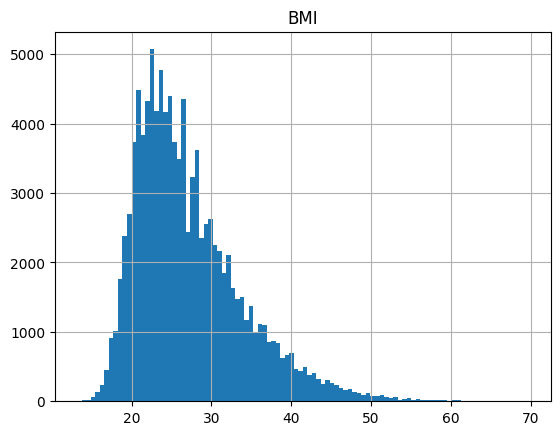

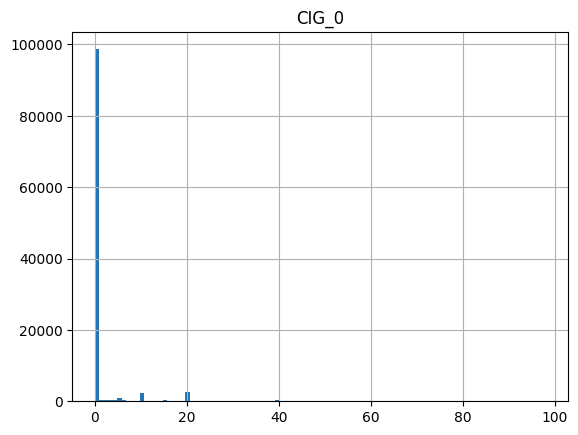

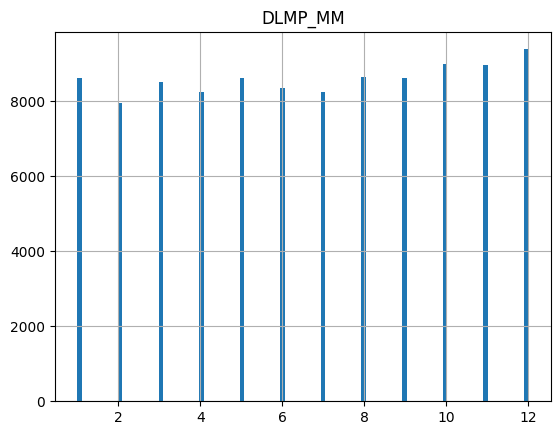

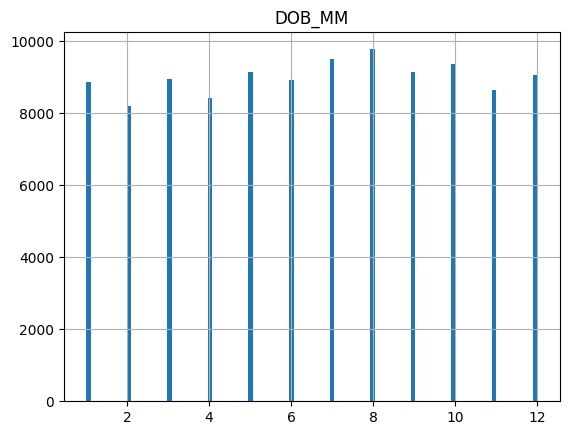

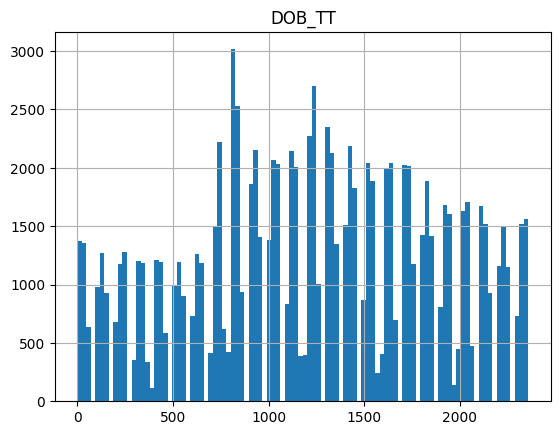

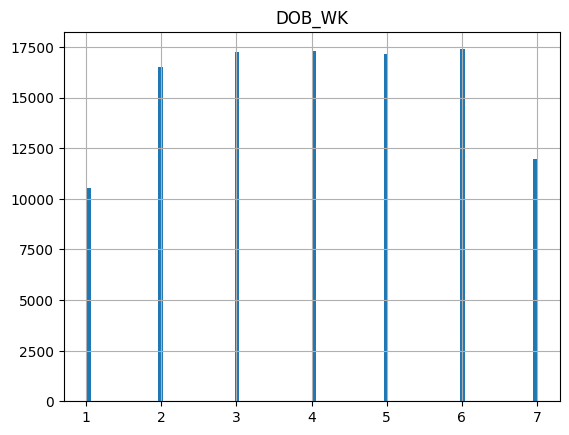

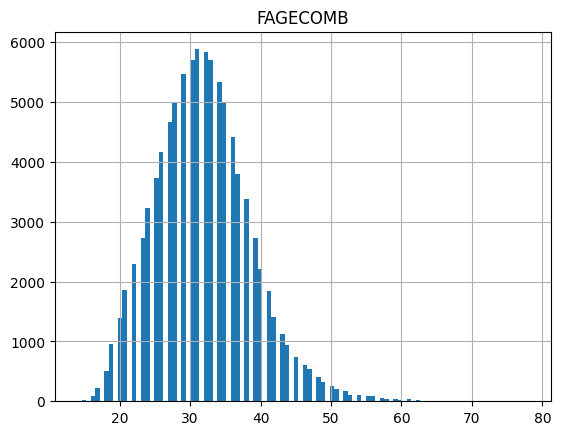

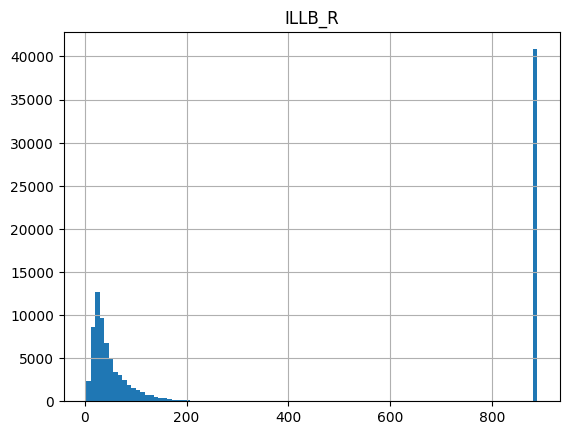

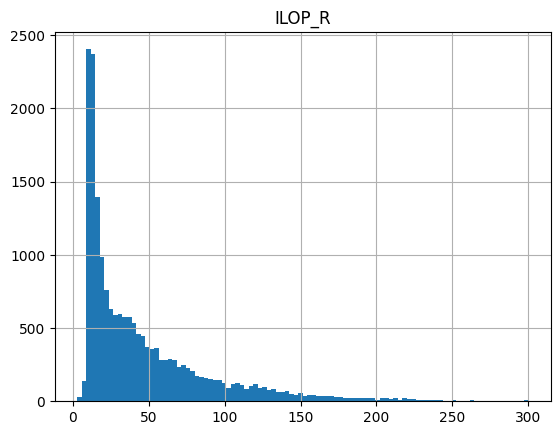

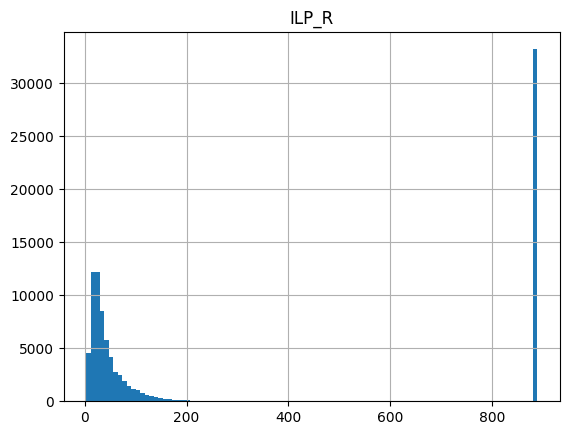

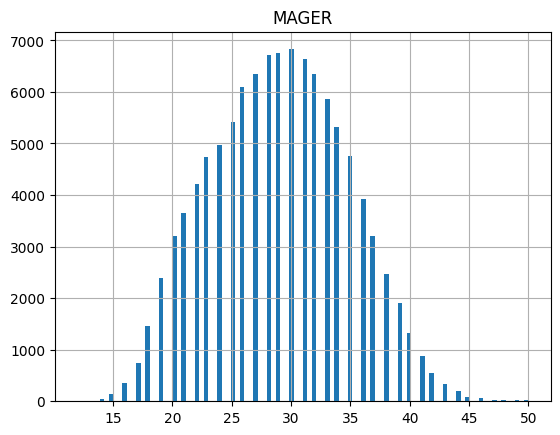

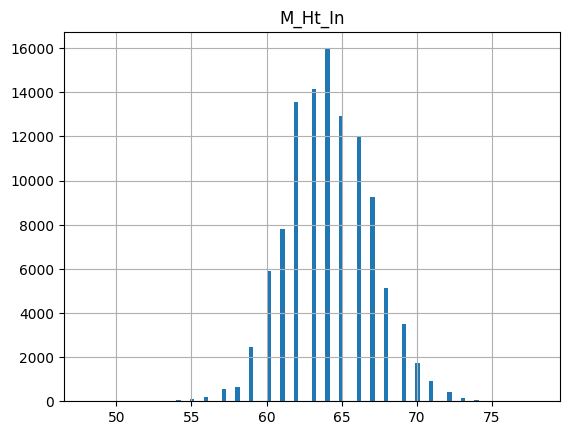

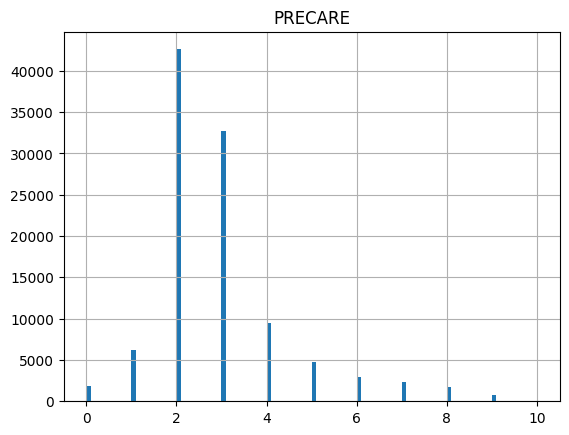

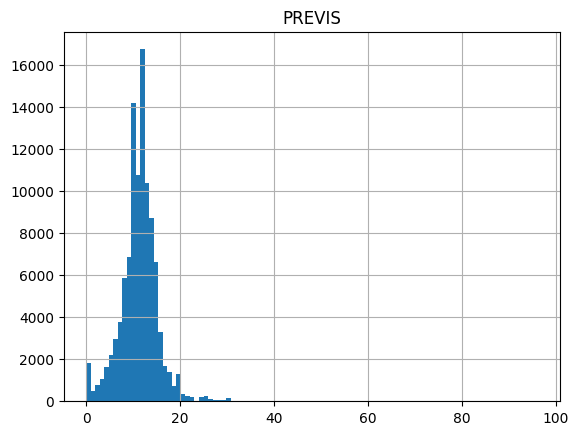

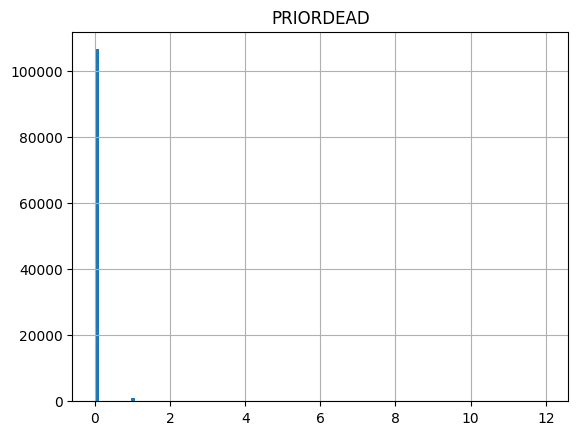

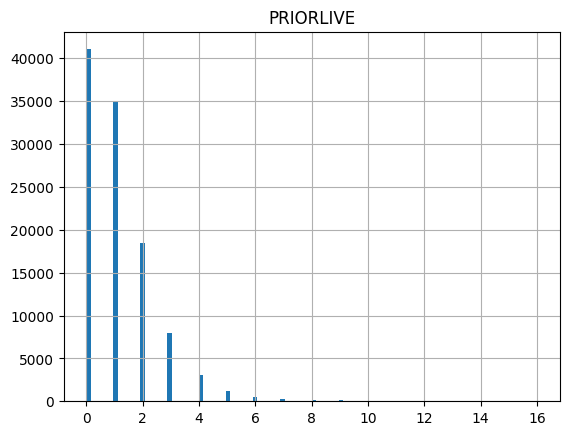

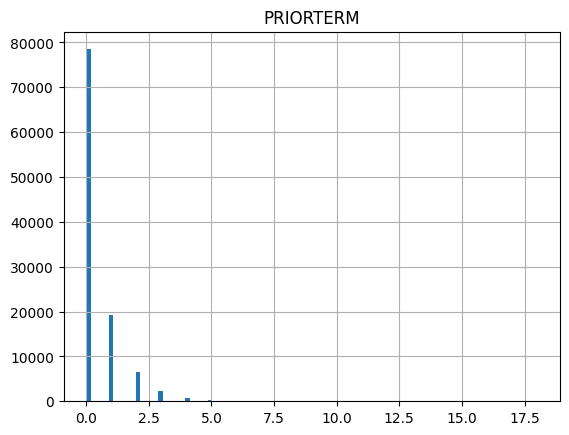

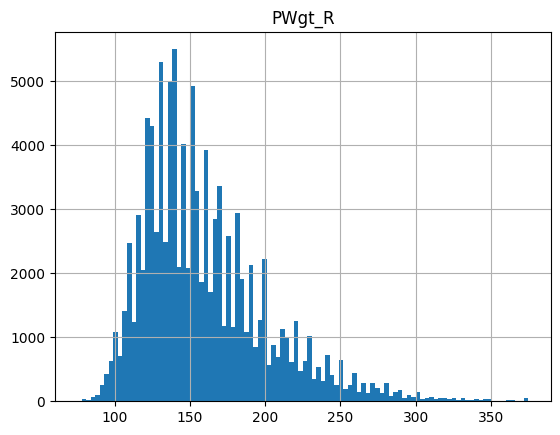

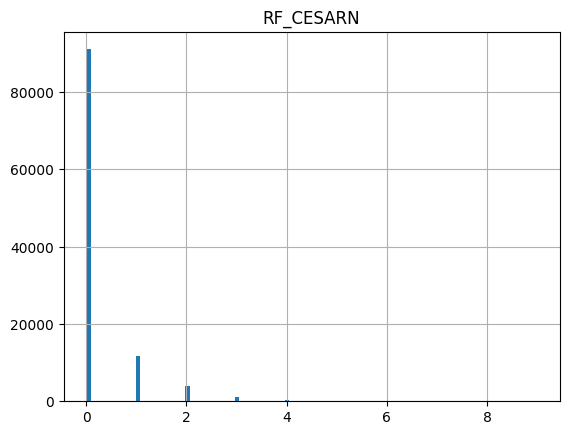

In [12]:
features = VARIABLE_TYPE.keys()

for feature in features:
    if "categorical" not in VARIABLE_TYPE[feature]:
        missing = (
            MISSING_CODE[feature]
            if isinstance(MISSING_CODE[feature], list)
            else [MISSING_CODE[feature]]
        )
        data.query(f"~{feature}.isin({missing})")[feature].hist(bins=100)
        plt.title(feature)
        plt.show()

# Test set

In [13]:
data_test = pd.read_csv("../data/test.csv")

for feature in features:
    if "categorical" in VARIABLE_TYPE[feature]:
        unique_values_train = set(data[feature].unique())
        unique_values_test = set(data_test[feature].unique())
        if unique_values_train.union(unique_values_test) != unique_values_train:
            print(f"categorical feature {feature} takes new values in the test set.")
    else:
        min_train, max_train = (
            data.query(f"{feature} != {MISSING_CODE[feature]}")[feature].min(),
            data.query(f"{feature} != {MISSING_CODE[feature]}")[feature].max(),
        )
        min_test, max_test = (
            data_test.query(f"{feature} != {MISSING_CODE[feature]}")[feature].min(),
            data_test.query(f"{feature} != {MISSING_CODE[feature]}")[feature].max(),
        )
        if (min_test < min_train) or (max_test > max_train):
            print(f"Possible extrapolation problem for {feature}.")
            print(f"Train range: \t{min_train}, {max_train}")
            print(f"Test range: \t{min_test}, {max_test}")

Possible extrapolation problem for M_Ht_In.
Train range: 	48, 78
Test range: 	30, 78


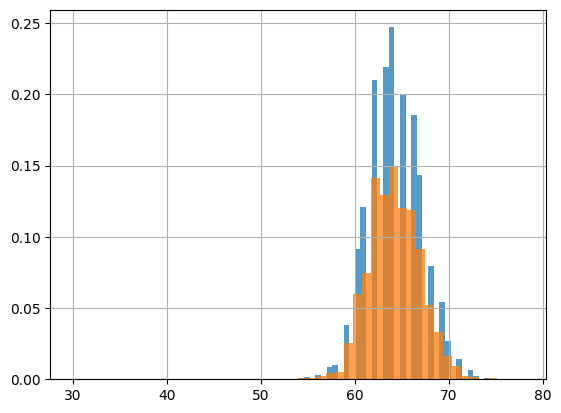

In [14]:
data.query(f"M_Ht_In != {MISSING_CODE['M_Ht_In']}")["M_Ht_In"].hist(
    bins=50, density=True, alpha=0.75
)
data_test.query(f"M_Ht_In != {MISSING_CODE['M_Ht_In']}")["M_Ht_In"].hist(
    bins=50, density=True, alpha=0.75
)
plt.show()

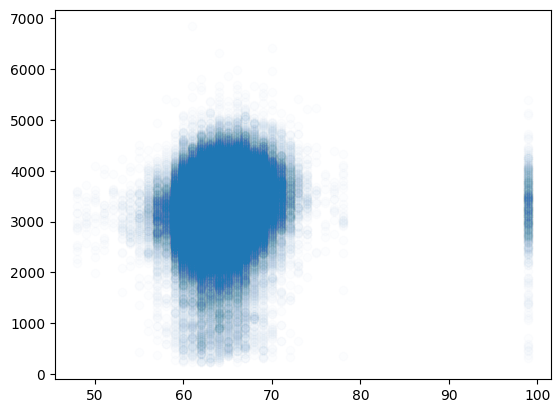

In [15]:
plt.scatter(data["M_Ht_In"], data["DBWT"], alpha=0.01)
plt.show()

# Response variable

<Axes: >

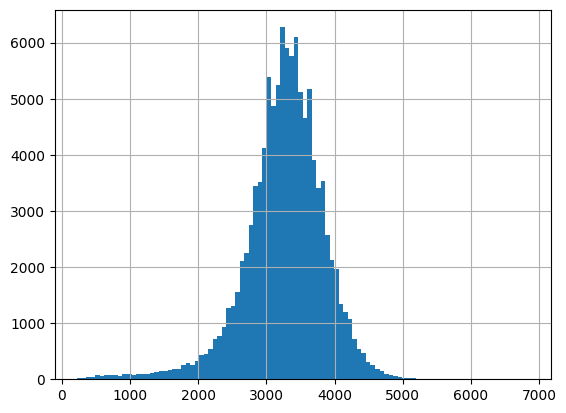

In [16]:
data["DBWT"].hist(bins=100)

# Discoveries of Note

`ILLB_R`, the number of months since last live birth, implicitly takes four "types:"
* values less than 3 mean "pleural delivery"
* values 3-300 are actually months since last live birth
* 888 means this is the first birth, so "months since last live birth" is undefined
* 999 means missing.

However, it might be possible to simply binarize this variable:

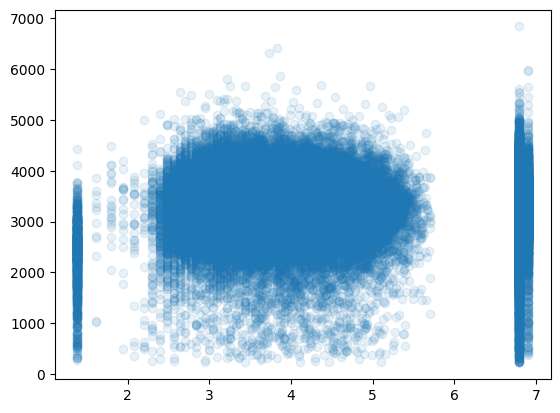

In [17]:
plt.scatter(np.log(data["ILLB_R"] + 1), data["DBWT"], alpha=0.1)
plt.show()

`ILP_R`, the interval since last pregnancy, is obviously related, and it might be wise to simply drop one. The difference would be previous terminations, which is covered in `PRIORTERM`.

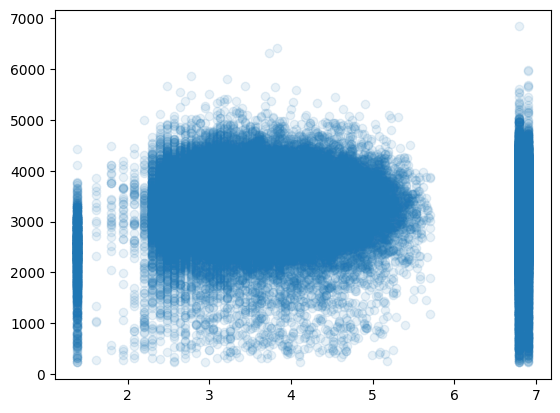

In [18]:
plt.scatter(np.log(data["ILP_R"] + 1), data["DBWT"], alpha=0.1)
plt.show()

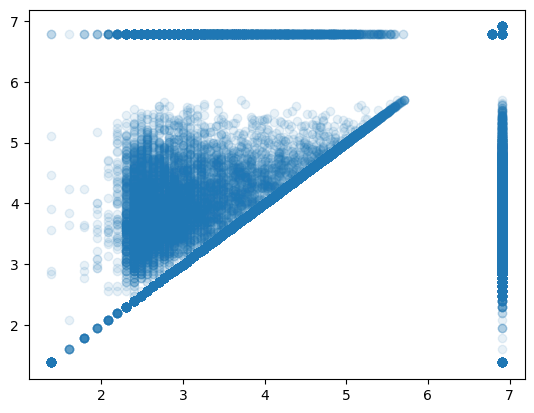

In [19]:
plt.scatter(np.log(data["ILP_R"] + 1), np.log(data["ILLB_R"] + 1), alpha=0.1)
plt.show()

In [20]:
print(data["ILP_R"].value_counts())
print(data["ILLB_R"].value_counts())

ILP_R
888    33169
999    12945
12      1537
23      1516
21      1453
       ...  
290        1
239        1
237        1
244        1
285        1
Name: count, Length: 278, dtype: int64
ILLB_R
888    40831
999     3431
23      1558
24      1475
25      1461
       ...  
281        1
284        1
256        1
290        1
282        1
Name: count, Length: 288, dtype: int64


`ILOP_R`seems related but in fact shows far fewer pleural pregnancies (and may clarify a trend for very short intervals), so binarization is not as attractive, although `888` = "not applicable" and `999` = "unknown" can be safely combined:

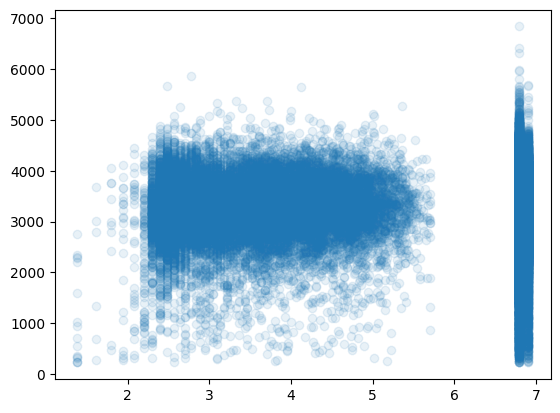

In [21]:
plt.scatter(np.log(data["ILOP_R"] + 1), data["DBWT"], alpha=0.1)
plt.show()

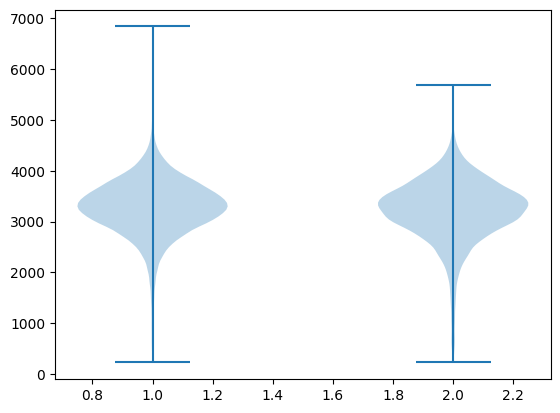

In [22]:
plt.violinplot([data.query(f"ILOP_R == {x}")["DBWT"] for x in [888, 999]])
plt.show()

The two are in fact not very related to each other.

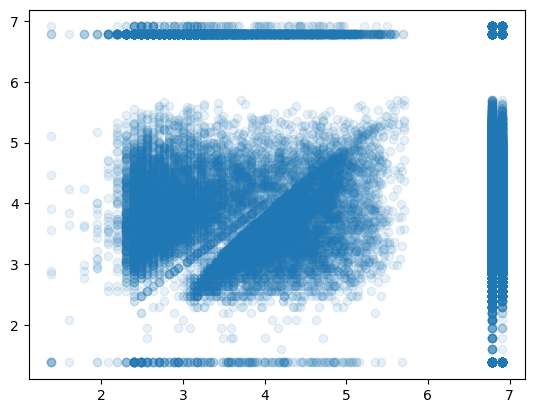

In [23]:
plt.scatter(np.log(data["ILOP_R"] + 1), np.log(data["ILLB_R"] + 1), alpha=0.1)
plt.show()

`PAY` and `PAY_REC` are very similar (`PAY` categories 4, 5, 6, and 8 are combined into `PAY_REC` category 4). They also have the same missingness. Marginally, neither seem important, so likely we can drop `PAY`:

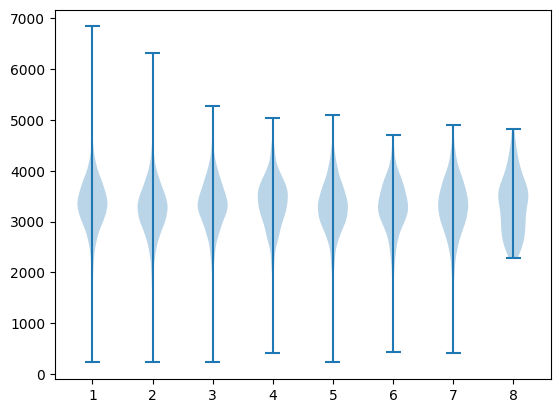

In [24]:
plt.violinplot([data.query(f"PAY == {x}")["DBWT"] for x in data["PAY"].unique()])
plt.show()

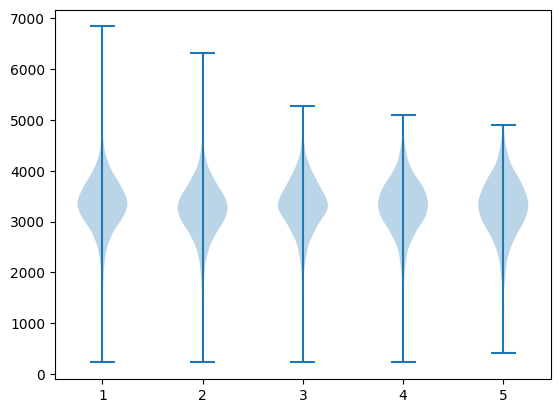

In [25]:
plt.violinplot(
    [data.query(f"PAY_REC == {x}")["DBWT"] for x in data["PAY_REC"].unique()]
)
plt.show()

`PRECARE` is the month during which pre-care began (0 if no care, 99 if missing):

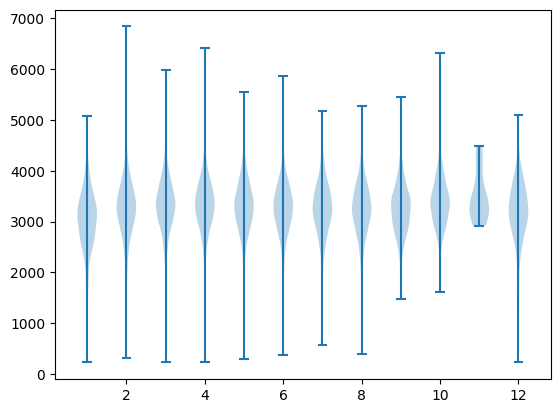

In [26]:
plt.violinplot(
    [data.query(f"PRECARE == {x}")["DBWT"] for x in [0] + list(range(1, 11)) + [99]]
)
plt.show()

No strong signal. Should we combine it with `DOB_MM` to engineer the feature "months before birth that care began"? Seems like no.

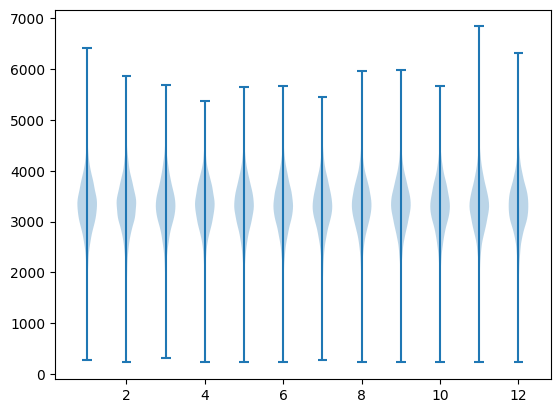

In [27]:
data["precare_months_before_birth"] = (data["DOB_MM"] - data["PRECARE"]).apply(
    lambda x: x % 12
)

plt.violinplot(
    [
        data.query("PRECARE != 99").query(f"precare_months_before_birth == {x}")["DBWT"]
        for x in range(12)
    ]
)
plt.show()

# Decisions

* Binarize `ILLB_R` to `<=3` and `>3`
* Drop `ILP_R` (it has more missing than the almost-equivalent `ILLB_R`)
* Set `888` and `999` to "missing" for `ILOP_R`
* Drop `PAY` (seems that `PAY_REC` covers it)
* Clip `M_Ht_In` to [48, 78]